In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [3]:
peng = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\pen-global-unsupervised-ad.csv', header = None)

In [4]:
peng

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47.0,100.0,27.0,81.0,57.0,37.0,26.0,0.0,0.0,23.0,56.0,53.0,100.0,90.0,40.0,98.0,n
1,0.0,89.0,27.0,100.0,42.0,75.0,29.0,45.0,15.0,15.0,37.0,0.0,69.0,2.0,100.0,6.0,o
2,0.0,57.0,31.0,68.0,72.0,90.0,100.0,100.0,76.0,75.0,50.0,51.0,28.0,25.0,16.0,0.0,o
3,0.0,100.0,7.0,92.0,5.0,68.0,19.0,45.0,86.0,34.0,100.0,45.0,74.0,23.0,67.0,0.0,o
4,0.0,67.0,49.0,83.0,100.0,100.0,81.0,80.0,60.0,60.0,40.0,40.0,33.0,20.0,47.0,0.0,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,57.0,89.0,0.0,100.0,1.0,68.0,43.0,34.0,30.0,0.0,1.0,31.0,41.0,65.0,100.0,86.0,n
805,20.0,77.0,61.0,100.0,100.0,80.0,48.0,46.0,9.0,7.0,68.0,0.0,25.0,39.0,0.0,82.0,n
806,84.0,90.0,0.0,91.0,51.0,56.0,98.0,19.0,36.0,0.0,43.0,40.0,100.0,75.0,62.0,100.0,n
807,42.0,99.0,55.0,61.0,71.0,24.0,18.0,0.0,0.0,30.0,64.0,61.0,100.0,94.0,9.0,100.0,n


In [5]:
shuffled_df = peng.sample(frac=1).reset_index(drop=True)
shuffled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,78.0,79.0,40.0,100.0,6.0,71.0,16.0,33.0,16.0,0.0,0.0,32.0,46.0,58.0,100.0,80.0,n
1,31.0,73.0,55.0,100.0,55.0,53.0,33.0,14.0,0.0,0.0,30.0,11.0,65.0,1.0,100.0,1.0,o
2,23.0,78.0,51.0,100.0,100.0,78.0,70.0,40.0,40.0,0.0,78.0,2.0,37.0,37.0,0.0,74.0,n
3,64.0,87.0,0.0,100.0,35.0,53.0,78.0,6.0,19.0,0.0,61.0,41.0,100.0,82.0,44.0,78.0,n
4,62.0,77.0,24.0,100.0,1.0,71.0,41.0,36.0,50.0,0.0,0.0,22.0,42.0,55.0,100.0,74.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0.0,79.0,25.0,50.0,98.0,25.0,71.0,0.0,10.0,16.0,50.0,47.0,100.0,76.0,83.0,100.0,n
805,69.0,91.0,10.0,95.0,34.0,46.0,50.0,0.0,0.0,23.0,62.0,50.0,100.0,87.0,36.0,100.0,n
806,29.0,72.0,45.0,100.0,78.0,78.0,60.0,41.0,25.0,12.0,0.0,4.0,50.0,6.0,100.0,0.0,o
807,48.0,88.0,28.0,58.0,34.0,9.0,0.0,0.0,25.0,42.0,66.0,77.0,100.0,100.0,49.0,78.0,n


In [6]:
df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.844582,-0.091289,-0.003673,1.006371,-1.369197,0.555188,-1.089640,0.142812,-0.710295,-0.998111,-1.280685,-0.160285,-0.692538,-0.173050,1.472828,0.246017
1,-0.666501,-0.424712,0.539905,1.006371,0.020651,-0.060269,-0.527995,-0.494947,-1.241130,-0.998111,-0.447694,-0.942105,-0.037864,-1.949113,1.472828,-2.577320
2,-0.923707,-0.146860,0.394951,1.006371,1.297041,0.794533,0.694410,0.377776,0.085957,-0.998111,0.885092,-1.277171,-1.002648,-0.827389,-1.123638,0.031586
3,0.394472,0.353274,-1.453214,1.006371,-0.546634,-0.060269,0.958714,-0.763477,-0.610764,-0.998111,0.413063,0.174781,1.168116,0.574766,0.018808,0.174540
4,0.330171,-0.202430,-0.583490,1.006371,-1.511018,0.555188,-0.263691,0.243511,0.417729,-0.998111,-1.280685,-0.532580,-0.830365,-0.266527,1.472828,0.031586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,-1.663174,-0.091289,-0.547251,-1.418150,1.240313,-1.017647,0.727448,-0.964875,-0.909358,-0.234499,0.107633,0.398158,1.168116,0.387812,1.031429,0.960785
805,0.555226,0.575556,-1.090829,0.763919,-0.574998,-0.299614,0.033651,-0.964875,-1.241130,0.099581,0.440830,0.509847,1.168116,0.730561,-0.188910,0.960785
806,-0.730803,-0.480282,0.177520,1.006371,0.673028,0.794533,0.364030,0.411342,-0.411701,-0.425402,-1.280685,-1.202712,-0.554712,-1.793318,1.472828,-2.613058
807,-0.119939,0.408844,-0.438536,-1.030226,-0.574998,-1.564721,-1.618248,-0.964875,-0.411701,1.006370,0.551895,1.515045,1.168116,1.135628,0.148631,0.174540


In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)

10


In [12]:
pca = PCA(n_components=10)
new_df = pca.fit_transform(df)

In [13]:
new_df

array([[ 1.80877639, -1.66091284,  0.93801542, ...,  0.11050405,
         0.47888655,  0.6475313 ],
       [ 1.92896102,  0.63381021, -0.41206302, ...,  1.38120586,
         2.51293251, -0.39305004],
       [ 1.22075668,  1.056268  , -1.10803902, ...,  0.28836888,
        -0.63068598,  0.43973698],
       ...,
       [ 3.0018729 ,  1.06166311, -1.12104909, ...,  1.30113993,
         1.91877886, -0.40660255],
       [-3.08259516, -0.27819398,  1.09756726, ...,  0.29941499,
         0.23865286, -0.15768961],
       [-1.47767273, -2.04480938, -2.01662301, ..., -0.4208065 ,
        -0.01305406,  0.0290833 ]])

In [14]:
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5,6,7,8,9
0,1.808776,-1.660913,0.938015,-1.512526,-0.151482,0.707555,-0.659808,0.110504,0.478887,0.647531
1,1.928961,0.633810,-0.412063,-0.927539,-0.624659,0.288936,-1.331626,1.381206,2.512933,-0.393050
2,1.220757,1.056268,-1.108039,1.406158,-1.838312,-0.911336,-0.677159,0.288369,-0.630686,0.439737
3,-0.534110,-2.018734,-1.104743,0.707648,0.422084,-0.259332,-1.127910,-0.641384,0.611314,-0.131022
4,2.381504,-1.523753,0.777646,-0.289645,0.537712,0.803906,-0.602643,0.261423,0.055463,0.309314
...,...,...,...,...,...,...,...,...,...,...
804,-2.200272,-0.441323,-0.558922,0.844924,-0.752025,1.958903,0.133054,0.736332,0.195536,-1.248972
805,-1.540822,-1.837312,-0.698065,-0.366990,0.295662,-0.138640,-0.917030,-0.687447,0.328836,0.266967
806,3.001873,1.061663,-1.121049,-0.286848,-0.365269,0.751348,-0.218823,1.301140,1.918779,-0.406603
807,-3.082595,-0.278194,1.097567,-1.117768,1.303963,0.360487,-0.376164,0.299415,0.238653,-0.157690


In [15]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [16]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))

In [17]:
y

,16
0,0
1,1
2,0
3,0
4,0
...,...
804,0
805,0
806,1
807,0


Performance over multiple parameters

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

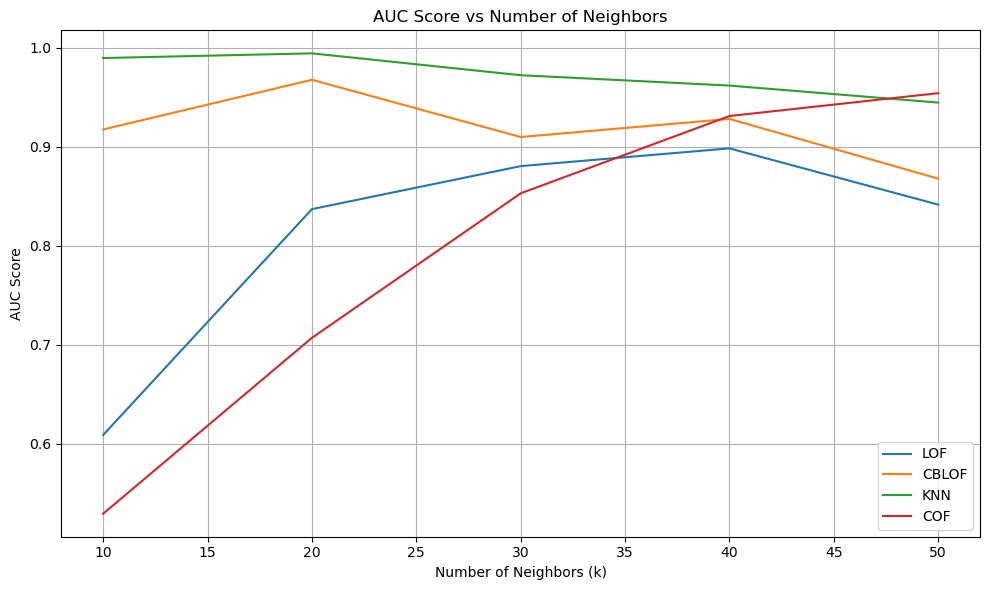

In [18]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
auc_scores_cof = []
n_neighbors_list = [10,20,30,40,50]
accuracy_scores_lof = []
accuracy_scores_cblof = []
accuracy_scores_knn = []
accuracy_scores_cof = []

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    lof_pred = lof_model.labels_
    auc_lof = roc_auc_score(y, y_scores_lof)

    auc_scores_lof.append(auc_lof)
    accuracy_lof = accuracy_score(y, lof_pred)
    accuracy_scores_lof.append(accuracy_lof)

    cof_model = COF(n_neighbors=n_neighbors)
    cof_model.fit(df)
    y_scores_cof = cof_model.decision_function(df)
    cof_pred = cof_model.labels_
    auc_cof = roc_auc_score(y, y_scores_cof)

    auc_scores_cof.append(auc_cof)
    accuracy_cof = accuracy_score(y, cof_pred)
    accuracy_scores_cof.append(accuracy_cof)


    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    cblof_pred = cblof_model.labels_
    auc_cblof = roc_auc_score(y, y_scores_cblof)

    auc_scores_cblof.append(auc_cblof)
    accuracy_cblof = accuracy_score(y, cblof_pred)
    accuracy_scores_cblof.append(accuracy_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    knn_pred = knn_model.labels_
    auc_knn = roc_auc_score(y, y_scores_knn)

    auc_scores_knn.append(auc_knn)
    accuracy_knn = accuracy_score(y, knn_pred)
    accuracy_scores_knn.append(accuracy_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)
mean_auc_cof = np.mean(auc_scores_cof)
mean_acc_lof = np.mean(accuracy_scores_lof)
mean_acc_cblof = np.mean(accuracy_scores_cblof)
mean_acc_knn = np.mean(accuracy_scores_knn)
mean_acc_cof = np.mean(accuracy_scores_cof)
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

plt.plot(n_neighbors_list, auc_scores_cof, label='COF')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
print("KNN auc",mean_auc_knn)
print("LOF auc",mean_auc_lof)
print("CBLOF auc",mean_auc_cblof)
print("COF auc",mean_auc_cof)

print("KNN acc",mean_acc_knn)
print("LOF acc",mean_acc_lof)
print("CBLOF acc",mean_acc_cblof)
print("COF acc",mean_acc_cof)



KNN auc 0.972512749188688
LOF auc 0.8132467933858756
CBLOF auc 0.9181579354041107
COF auc 0.7949126873744399
KNN acc 0.9404202719406676
LOF acc 0.8909765142150803
CBLOF acc 0.9374536464771323
COF acc 0.8889987639060569
